In [1]:
# Notebook: Expression Analysis of PARP9 DTX3l and AIM2
# Description: Notebook contains analysis of genes expresion for covid-19 and non-covid-19 patients

In [2]:
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

import scipy.stats as sts

In [3]:
%load_ext lab_black

In [4]:
expression_data = pd.read_table("../Expression/GSE157103_genes.tpm.tsv", index_col=0).T

genes = ["PARP9", "DTX3L", "AIM2"]
expression_data = expression_data[genes]

In [25]:
expression_data["TYPE"] = [
    "COVID-19 USA" if name.startswith("C") else "non-COVID-19 USA"
    for name in expression_data.index
]
expression_data

#symbol,PARP9,DTX3L,AIM2,TYPE
C1,402.93,145.23,102.60,COVID-19 USA
C2,112.39,39.90,36.29,COVID-19 USA
C3,431.47,122.19,157.94,COVID-19 USA
C4,100.88,40.19,16.85,COVID-19 USA
C5,398.58,95.64,279.70,COVID-19 USA
...,...,...,...,...
NC22,13.07,7.99,5.84,non-COVID-19 USA
NC23,82.05,23.73,61.93,non-COVID-19 USA
NC24,62.55,24.23,15.15,non-COVID-19 USA
NC25,15.18,14.29,4.67,non-COVID-19 USA


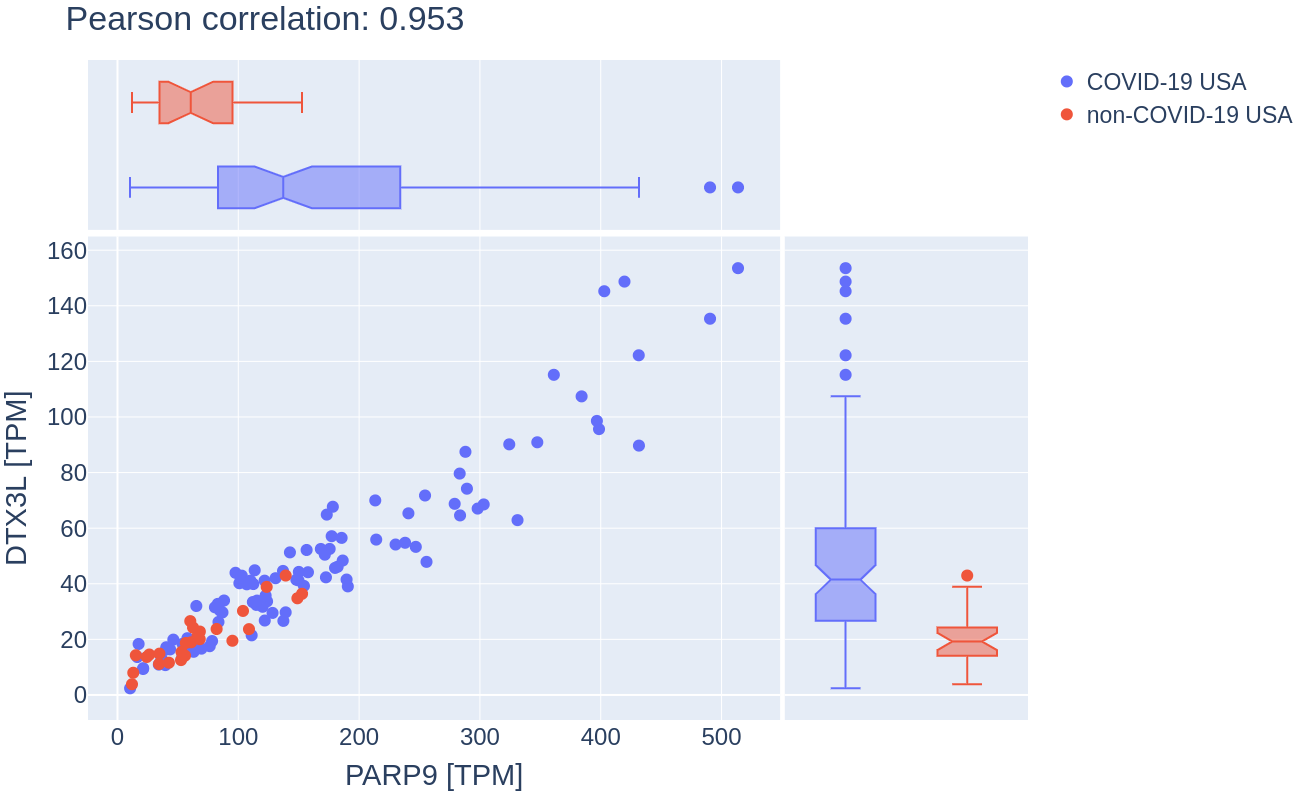

In [26]:
df = expression_data

X = expression_data.iloc[:, 0].values.reshape(-1, 1)
y = expression_data.iloc[:, 1].values.reshape(-1, 1)

# Correlation
coef, pval = sts.pearsonr(X.flatten(), y.flatten())

fig = px.scatter(
    df,
    x="PARP9",
    y="DTX3L",
    color="TYPE",
    marginal_x="box",
    marginal_y="box",
    labels={"DTX3L": "DTX3L [TPM]", "PARP9": "PARP9 [TPM]"},
)

fig.update_layout(
    title=f"Pearson correlation: {round(coef, 3)}",
    showlegend=True,
)

fig.update_layout(
    legend=dict(font=dict(size=23), title=""),
    font=dict(size=24),
    width=2000,
    height=800,
)

fig.update_traces(marker=dict(size=12))

fig.write_image(f"../Plots/PARP9_DTX3L_Correlation.jpg")
fig.show()

In [27]:
scl = StandardScaler()
scaled_expression_data = pd.DataFrame(
    scl.fit_transform(expression_data.drop("TYPE", axis=1)),
    columns=genes,
    index=expression_data.index,
)

scaled_expression_data

,PARP9,DTX3L,AIM2
C1,2.264765,3.361594,1.017514
C2,-0.308322,-0.079247,-0.351898
C3,2.517522,2.608941,2.160378
C4,-0.410258,-0.069773,-0.753366
C5,2.226241,1.741626,4.674925
...,...,...,...
NC22,-1.187923,-1.121658,-0.980741
NC23,-0.577020,-0.607476,0.177611
NC24,-0.749717,-0.591142,-0.788474
NC25,-1.169236,-0.915855,-1.004904


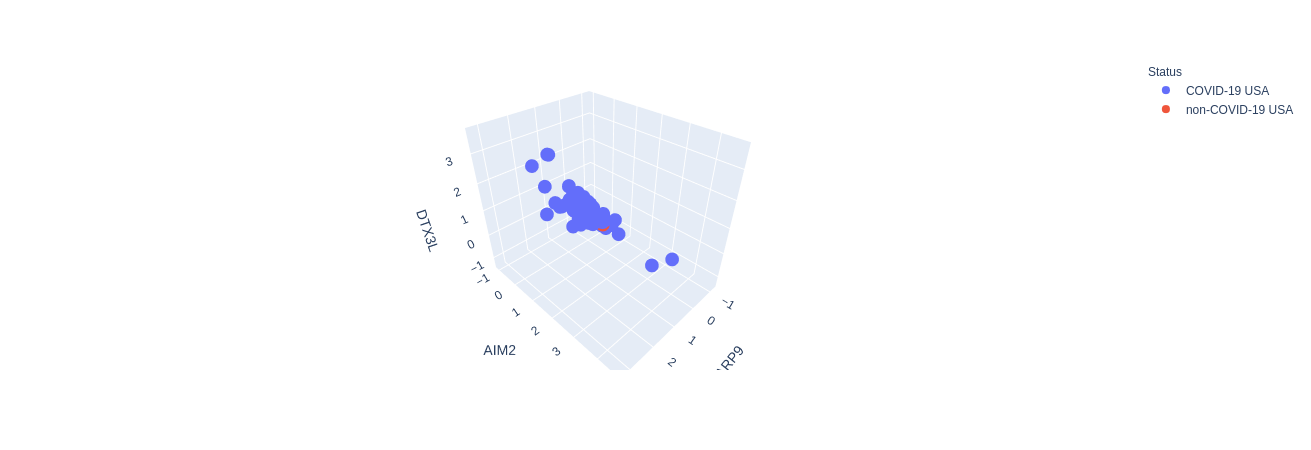

In [28]:
scaled_expression_data["Status"] = expression_data["TYPE"]
px.scatter_3d(scaled_expression_data, x="PARP9", z="DTX3L", y="AIM2", color="Status")

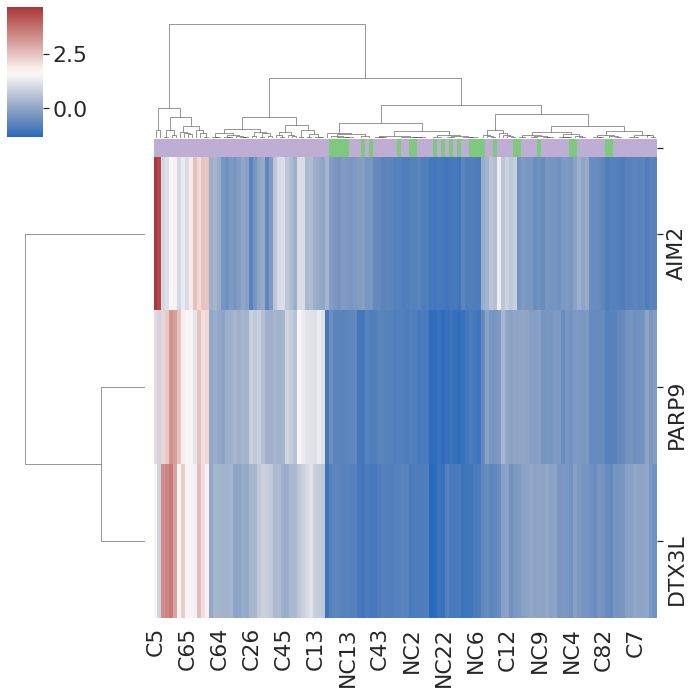

In [29]:
pal = sns.color_palette("Accent", expression_data["TYPE"].nunique())
lut = dict(zip(map(str, expression_data["TYPE"].unique()[::-1]), pal))
colors = expression_data["TYPE"].map(lut)
colors.name = ""

sns.set(font_scale=2)

fig = sns.clustermap(
    scaled_expression_data.drop("Status", axis=1).T,
    method="ward",
    cmap="vlag",
    col_colors=colors,
)

fig.savefig("../Plots/ClusterMapsExpression/Clustermap_AIM2_PARP_DTX3L_USA.jpg")
plt.show()

In [30]:
scaled_expression_data

,PARP9,DTX3L,AIM2,Status
C1,2.264765,3.361594,1.017514,COVID-19 USA
C2,-0.308322,-0.079247,-0.351898,COVID-19 USA
C3,2.517522,2.608941,2.160378,COVID-19 USA
C4,-0.410258,-0.069773,-0.753366,COVID-19 USA
C5,2.226241,1.741626,4.674925,COVID-19 USA
...,...,...,...,...
NC22,-1.187923,-1.121658,-0.980741,non-COVID-19 USA
NC23,-0.577020,-0.607476,0.177611,non-COVID-19 USA
NC24,-0.749717,-0.591142,-0.788474,non-COVID-19 USA
NC25,-1.169236,-0.915855,-1.004904,non-COVID-19 USA


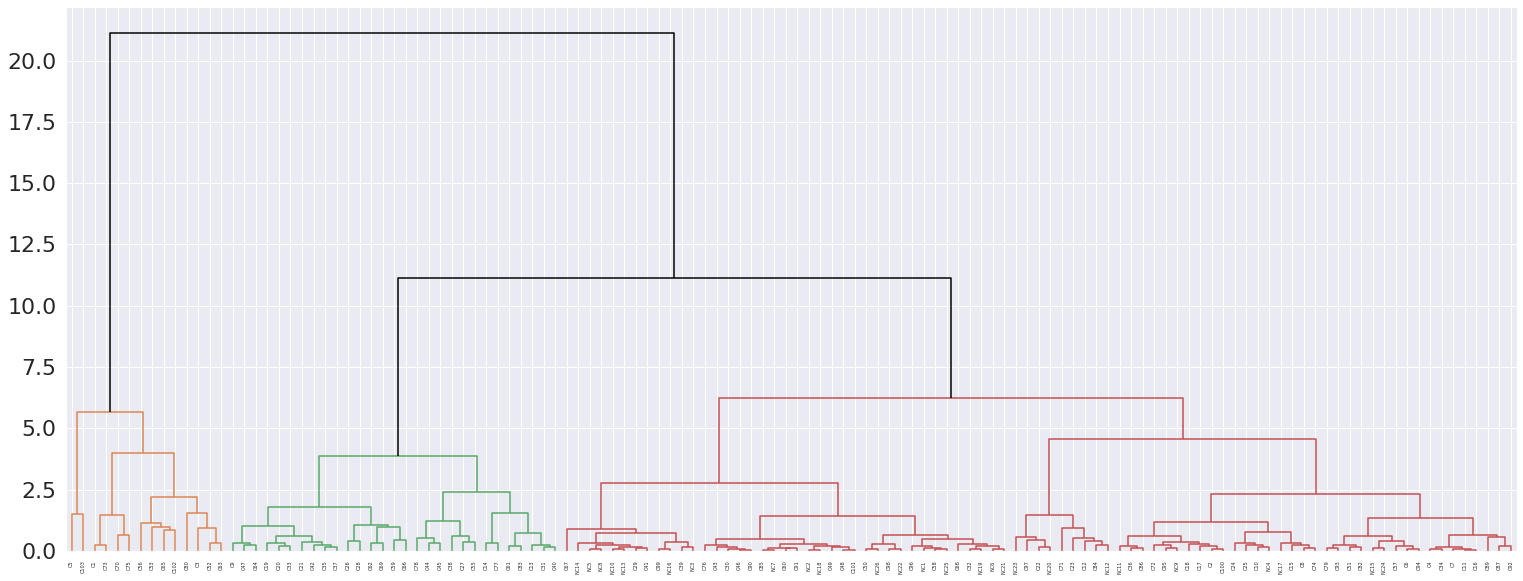

In [31]:
fig = plt.figure(figsize=(26, 10))

Z = linkage(scaled_expression_data.drop("Status", axis=1), "ward")
dn = dendrogram(
    Z,
    labels=scaled_expression_data.index,
    color_threshold=10,
    above_threshold_color="00000",
    truncate_mode=None,
)

plt.show()

In [16]:
cls_ = fcluster(Z, t=10, criterion="distance")
cls_ = pd.DataFrame(cls_, index=scaled_expression_data.index, columns=["Cluster"])
cls_

,Cluster
C1,1
C2,3
C3,1
C4,3
C5,1
...,...
NC22,3
NC23,3
NC24,3
NC25,3


In [35]:
pd.read_csv("../data/raw/Annotations/Clinical_GSE174818.csv", index_col=0)

,Covid (1=yes),Diagnosis,ICU (1=yes),Sex,Age,Ethnicity,BMI,WHO ordinal at day 28,Charlson,APACHEII,...,Rheumatic disease,PUD,Liver disese,DM,Hemiplegia,Renal disease,Cancer (solid),HIV/AIDS,Leukemia/lymphoma,Smoking 1=y (current or former);0=never;?=unknown
Albany_sampleID,,,,,,,,,,,,,,,,,,,,,
C1,1,COVID-19,0,M,39,W,31.60,8,0,15.0,...,0,0,0,0,0,0,0,0,0,0
C2,1,COVID-19,0,M,63,H,28.70,0,2,NaN,...,0,0,0,0,0,0,0,0,0,1
C3,1,COVID-19,0,M,33,W,29.41,3,2,NaN,...,0,0,0,1,0,0,0,0,0,0
C4,1,COVID-19,0,M,49,W,27.55,0,1,NaN,...,0,0,0,0,0,0,0,0,0,0
C5,1,COVID-19,0,M,49,H,30.40,0,1,19.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NC22,0,pneumonia,0,M,63,AA,25.40,0,2,4.0,...,0,0,0,0,0,0,0,0,0,0
NC23,0,pneumonia,0,F,42,W,27.46,0,2,NaN,...,0,0,0,0,0,1,0,0,0,0
NC24,0,pneumonia,0,F,32,W,18.50,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0


In [36]:
clinical = pd.read_csv("../data/raw/Annotations/Clinical_GSE174818.csv", index_col=0)
ins = set.intersection(set(clinical.index), set(cls_.index))

clinical = pd.concat(
    (cls_.loc[ins], clinical.loc[ins, ["ICU (1=yes)", "Covid (1=yes)"]]), axis=1
)

display(pd.crosstab(clinical["Cluster"], clinical["Covid (1=yes)"], margins=True))

clinical = clinical.loc[[name for name in clinical.index if name.startswith("C")]]
clinical

Covid (1=yes),0,1,All
Cluster,,,
1,0,14,14
2,0,29,29
3,26,57,83
All,26,100,126


,Cluster,ICU (1=yes),Covid (1=yes)
Albany_sampleID,,,
C82,3,0,1
C13,2,0,1
C35,2,0,1
C48,3,1,1
C78,2,0,1
...,...,...,...
C100,3,0,1
C19,2,0,1
C52,1,0,1


In [41]:
cross_table = pd.crosstab(clinical["Cluster"], clinical["ICU (1=yes)"], margins=True)
cross_table

ICU (1=yes),0,1,All
Cluster,,,
1,12,2,14
2,11,18,29
3,27,30,57
All,50,50,100


In [34]:
_, pval, _, _ = sts.chi2_contingency(
    pd.crosstab(clinical["Cluster"], clinical["ICU (1=yes)"])
)

pval

0.011162408542920136

In [23]:
cross_table.to_csv("../Plots/ClusterMapsExpression/crsTable_ICU_AIM_PARP_DTX3l.csv")